In [1]:
import pandas as pd 
import numpy as np



In [2]:
df = pd.read_csv('Downloads/hacktrain.csv')
display(df)


,Unnamed: 0,ID,class,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,0,1,water,637.5950,658.668,-1882.030,-1924.36,997.904,-1739.990,630.087,...,NaN,-1043.160,-1942.490,267.138,NaN,NaN,211.328,-2203.020,-1180.19,433.906
1,1,2,water,634.2400,593.705,-1625.790,-1672.32,914.198,-692.386,707.626,...,NaN,-933.934,-625.385,120.059,364.858,476.972,220.878,-2250.000,-1360.56,524.075
2,3,4,water,58.0174,-1599.160,NaN,-1052.63,NaN,-1564.630,NaN,...,-1025.880,368.622,NaN,-1227.800,304.621,NaN,369.214,-2202.120,NaN,-1343.550
3,4,5,water,72.5180,NaN,380.436,-1256.93,515.805,-1413.180,-802.942,...,-1813.950,155.624,NaN,-924.073,432.150,282.833,298.320,-2197.360,NaN,-826.727
4,7,8,water,1136.4400,NaN,NaN,1647.83,1935.800,NaN,2158.980,...,1535.000,1959.430,-279.317,-384.915,-113.406,1020.720,1660.650,-116.801,-568.05,-1357.140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,10537,10538,impervious,1207.7000,984.620,NaN,1166.25,937.478,1072.700,823.896,...,1117.740,1176.600,1044.110,NaN,369.082,465.843,362.882,979.795,NaN,433.659
7996,10538,10539,impervious,2170.3500,1419.720,1361.000,1478.71,983.911,1262.110,1422.860,...,984.634,2128.970,1379.660,NaN,762.633,485.204,446.724,771.747,1589.06,506.936
7997,10541,10542,impervious,1895.6800,1454.740,NaN,1033.56,1930.380,1057.150,1471.600,...,888.408,2093.020,1232.110,1190.830,1441.460,1170.880,1095.000,1818.650,2501.72,1247.770
7998,10542,10543,impervious,3465.7400,1283.320,413.412,4391.05,1146.820,4473.050,1614.750,...,5833.760,4047.320,4515.800,433.177,277.296,744.143,NaN,3759.710,NaN,388.346


In [3]:
df.isnull().sum()

Unnamed: 0       0
ID               0
class            0
20150720_N     560
20150602_N    1200
20150517_N     800
20150501_N     960
20150415_N     480
20150330_N    1120
20150314_N     720
20150226_N    1360
20150210_N     640
20150125_N    1040
20150109_N     880
20141117_N    1280
20141101_N     400
20141016_N    1440
20140930_N     800
20140813_N     560
20140626_N    1600
20140610_N     480
20140525_N     720
20140509_N     880
20140423_N    1760
20140407_N     640
20140322_N    1120
20140218_N    1440
20140202_N     560
20140117_N    1200
20140101_N     400
dtype: int64

In [4]:
df.drop(columns =['Unnamed: 0','ID'],inplace=True)
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = df.groupby('class')[numeric_cols].transform(lambda x: x.fillna(x.median()))

In [5]:

non_feature_cols = ['class']
feature_cols = df.columns.difference(non_feature_cols)


def remove_iqr_outliers_by_class(df, class_col, feature_cols, multiplier=1.5):
    df_cleaned = pd.DataFrame()
    
    for class_name, group in df.groupby(class_col):
        Q1 = group[feature_cols].quantile(0.25)
        Q3 = group[feature_cols].quantile(0.75)
        IQR = Q3 - Q1
        
 
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR
        

        mask = ~((group[feature_cols] < lower_bound) | (group[feature_cols] > upper_bound)).any(axis=1)
        
  
        df_cleaned = pd.concat([df_cleaned, group[mask]])
    
    return df_cleaned


df_iqr_cleaned = remove_iqr_outliers_by_class(df, 'class', feature_cols)


df.shape, df_iqr_cleaned.shape

((8000, 28), (3834, 28))

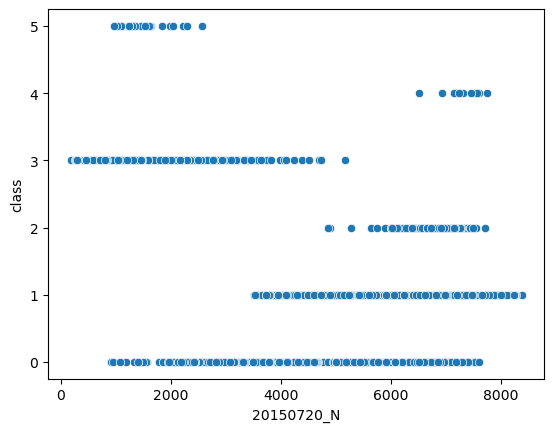

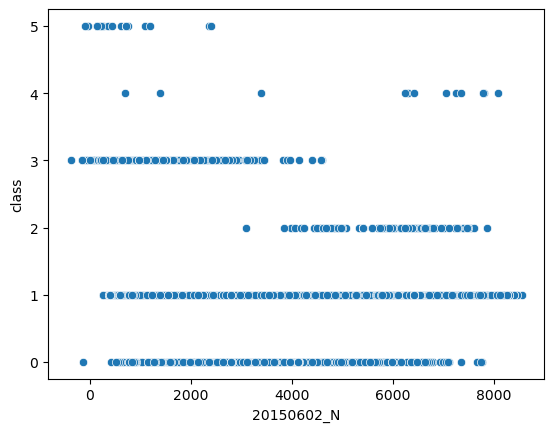

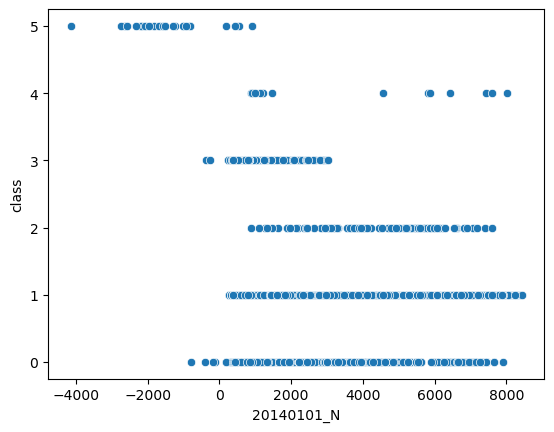

In [21]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns 
import matplotlib.pyplot as plt


sns.scatterplot(x='20150720_N' ,y='class',data=df_iqr_cleaned)
plt.show()


sns.scatterplot(x='20150602_N' ,y='class',data=df_iqr_cleaned)
plt.show()

sns.scatterplot(x='20140101_N' ,y='class',data=df_iqr_cleaned)
plt.show()


In [10]:
label_encoder = LabelEncoder()
df_iqr_cleaned['class'] = label_encoder.fit_transform(df_iqr_cleaned['class'])


In [11]:
from sklearn.model_selection import train_test_split
x = df_iqr_cleaned.drop(columns=['class'])
y = df_iqr_cleaned['class']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=22,stratify=y)

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter= 100
)
model.fit(x_train,y_train)


y_pred = model.predict(x_test)

print(classification_report(
    y_test,
    y_pred,
     labels=list(range(len(label_encoder.classes_))),
    target_names=label_encoder.classes_
))
model.score(x_test,y_test)


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


              precision    recall  f1-score   support

        farm       0.85      0.81      0.83        83
      forest       0.96      0.97      0.96       581
       grass       0.79      0.61      0.69        18
  impervious       0.91      0.88      0.90        78
     orchard       0.50      1.00      0.67         2
       water       1.00      1.00      1.00         5

    accuracy                           0.94       767
   macro avg       0.83      0.88      0.84       767
weighted avg       0.94      0.94      0.94       767



C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9361147327249022

In [13]:
test_data = pd.read_csv('Downloads/hacktest.csv')
test_data.shape


(2845, 29)

In [14]:
ID = test_data['ID']
test_data.drop(columns =['Unnamed: 0','ID'],inplace=True)
test_data.head()


,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,20150210_N,20150125_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,7466.42,413.162,5761.00,5625.45,489.403,3923.84,3097.110,6766.42,2829.13,6742.570,...,801.184,927.115,4704.14,6378.42,340.949,2695.570,527.268,4736.75,601.843,6639.760
1,7235.26,6037.350,1027.56,6085.14,1618.050,6668.54,2513.990,1051.69,7268.22,6908.180,...,5533.470,5103.040,5216.12,4885.27,4366.790,1234.140,3298.110,6942.68,1070.440,842.101
2,7425.08,6969.980,1177.94,7408.93,861.061,7644.43,814.458,1504.29,7002.63,6086.560,...,1981.390,6204.540,7021.69,5704.41,4897.450,1789.990,2206.100,6928.93,1036.560,831.441
3,7119.12,1731.620,6311.93,6441.61,465.979,7128.42,1649.120,6935.22,2176.80,690.408,...,959.344,5794.150,1045.57,5572.90,586.287,685.906,1287.000,6734.72,824.584,6883.610
4,7519.55,8130.260,1482.54,7879.53,1001.210,7937.60,4122.530,1094.51,7951.44,8001.350,...,7636.070,6996.760,7413.43,4596.13,4511.700,1413.520,3283.940,7937.68,1857.800,1336.920


In [15]:
y_test = model.predict(test_data)
y_test

array([0, 1, 4, ..., 3, 3, 3])

In [16]:
y_decoded = label_encoder.inverse_transform(y_test)
y_decoded

array(['farm', 'forest', 'orchard', ..., 'impervious', 'impervious',
       'impervious'], dtype=object)

In [17]:
result = pd.DataFrame({
    'ID' : ID,
    'class' : y_decoded 
})

In [18]:
result

,ID,class
0,1,farm
1,2,forest
2,3,orchard
3,4,farm
4,5,orchard
...,...,...
2840,2841,water
2841,2842,water
2842,2843,impervious
2843,2844,impervious


In [120]:
result.to_csv("submission.csv", index=False)